# 인공지능(머신러닝) LLM
## 지도학습: 문제, 정답을 알려주고 패턴 찾는 것
* 분류분석, 회귀분석
## 비지도학습: 문제만 알려주고 알고리즘이 알아서 패턴을 찾는 것
* 군집분석 

# 분류 분석의 대표적인 알고리즘 Tree 기반 모델
# 의사결정나무(Decision Tree)
* Decision Tree는 데이터를 분할해서 조건문처럼 분기해 나가면서 예측하는 Tree 기반 모델
* 스무고개와 비슷하게 계속 질문을 던져서 분리
### 장점
* 직관적이고 해석 쉬움
* feature scaling(변수)이 필요 없음(MinMax, StandardScaler 사용을 하지 않아도 됨)
* 범주형(DecisionTreeClassifier), 수치형(DecisionTreeRegressor) 자료 모두를 분석 할 수 있음
* 시각화가 쉽고 직관적
### 단점
* 과적합(overfitting)이 잘 일어남
* 최적 트리를 찾기 어렵고 시간이 오래 걸릴 수 있음

0. 필요한 라이브러리 로딩
1. 타이타닉 데이터 로딩
2. 데이터 전처리(결측값처리, 이상값 탐지)
3. EDA(탐색적 데이터 분석, 각 컬럼의 데이터 분포, 그래프로, 문자 -> 숫자, 상관관계)
4. Fearture Engineering(변수 선택, 새로운 특성 생성
5. 최종 선택된 변수를 독립변수(X)와 종속변수(y)로 분리
6. sklearn의 train_test_split을 불러와서 train, test 세트로 분리
7. 카테고리 변수의 더미 변수화(one-hot encoding)
8. sklearn에서 DecisionTreeClassifier를 불러와서 모델 훈련
9. test 세트를 모델에 넣어서 예측값 생성(pred)
10. accuracy_score(), classificatio_report()를 이용해서 모델의 성능 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/Titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


데이터 타입에 큰 이상 없음

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 결측값 처리

In [5]:
data.isna().sum() / len(data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Cabin의 결측율이 77% 삭제예정, Age는 대치, Embarked도 대치

In [6]:
data['Age'] = data['Age'].fillna(data['Age'].mean()) #결측값 대치

In [7]:
data.info() #없어졌는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0]) #최빈값 구하고 0번째 인덱스 채워넣는거

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data = data.drop('Cabin', axis=1) #Cabin 삭제
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 이상값 탐지

<Axes: >

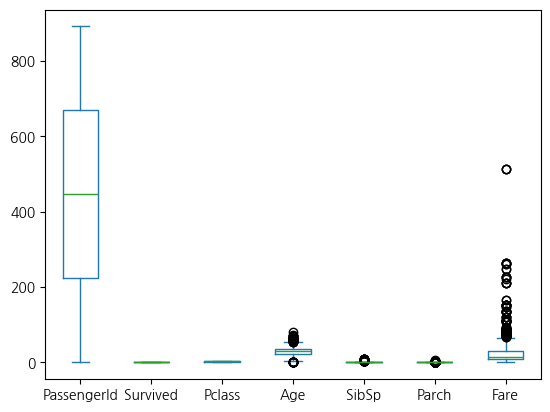

In [12]:
data.plot(kind='box') #이상값 탐지 가능

In [13]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Axes: >

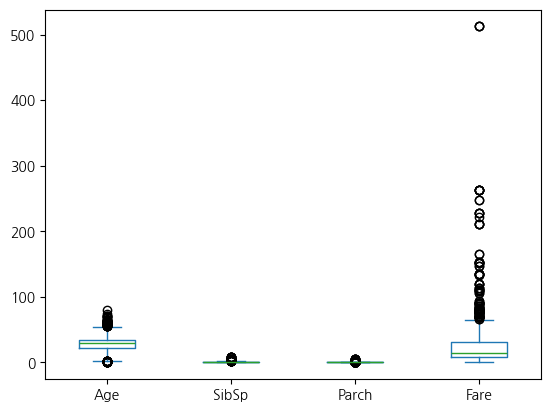

In [14]:
data[['Age', 'SibSp','Parch', 'Fare']].plot(kind='box') # 이상값들만 가져와서 따로보기

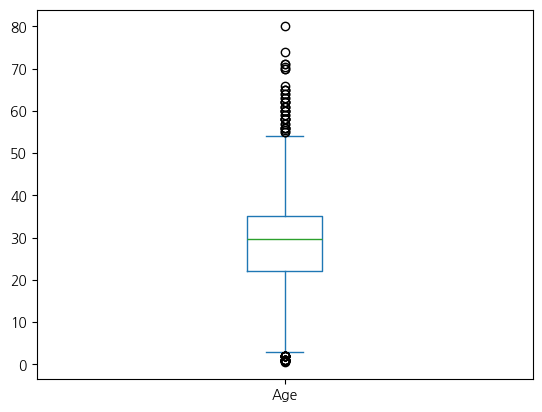

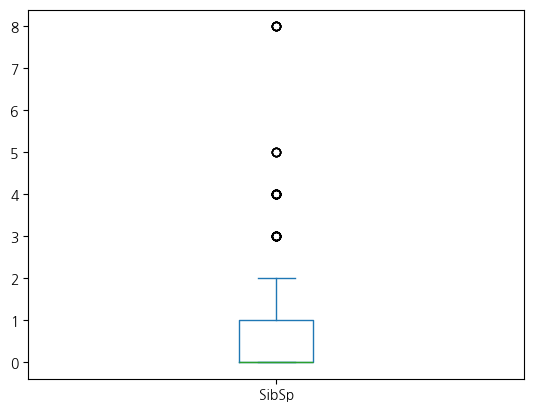

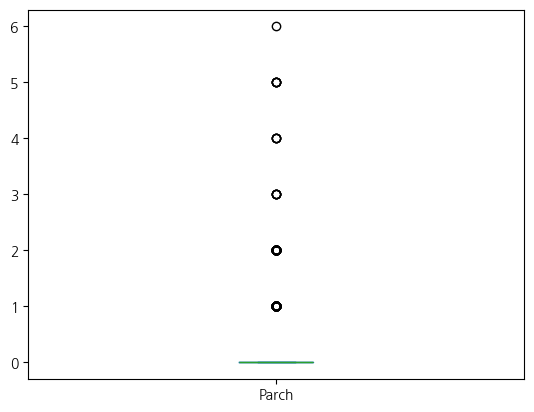

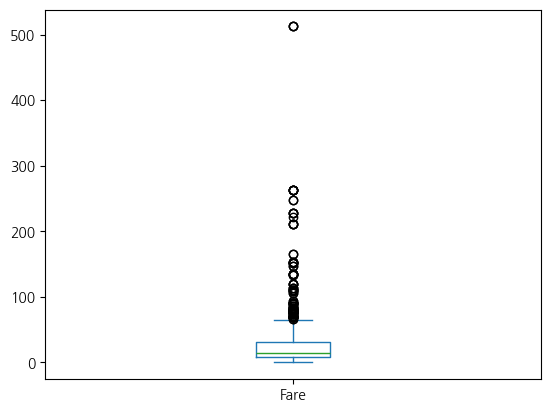

In [15]:
for col in ['Age', 'SibSp','Parch', 'Fare']:
    data[col].plot(kind='box')
    plt.show()

### Fare를 선실등급별로 이상값 탐지

In [16]:
fare_by_pclass = data[['Pclass', 'Fare']].groupby('Pclass').describe() #pclass 와 fare

In [17]:
fare_by_pclass

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [18]:
for item in fare_by_pclass.iterrows():
    max_value = item[1][('Fare','75%') ] + (1.5* (item[1][('Fare', '75%')] - item[1][('Fare','25%')]))
    print(f"{item[0]}등실의 정상 최고 가격 {max_value}")

1등실의 정상 최고 가격 187.364075
2등실의 정상 최고 가격 45.5
3등실의 정상 최고 가격 27.125


각 선실 등급별 이상값이 있는 컬럼 추출

In [19]:
outliers = data[((data['Pclass'] == 1) & (data['Fare'] > 187.364075)) | ((data['Pclass'] == 2) & (data['Fare'] > 45.5)) | ((data['Pclass'] == 3) & (data['Fare'] > 27.125))]

In [20]:
outliers.head(60).sort_values(by=['Fare']) #Fare가 같은애들끼리 정렬 -> 페어가 같으면 티켓가격이 같음을 알 수 있음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
63,64,0,3,"Skoog, Master. Harald",male,4.000000,3,2,347088,27.9000,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.000000,1,4,347088,27.9000,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.000000,3,2,347088,27.9000,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.000000,1,4,347088,27.9000,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.000000,3,2,347088,27.9000,S
278,279,0,3,"Rice, Master. Eric",male,7.000000,4,1,382652,29.1250,Q
171,172,0,3,"Rice, Master. Arthur",male,4.000000,4,1,382652,29.1250,Q
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,Q
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.000000,1,5,347082,31.2750,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.2750,S


Fare의 이상값을 가진 데이터들은 Ticket 번호가 같다. Fare는 객관성이 떨어짐(사람수에 의해 변동)

In [21]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [22]:
cate_cols = ['Survived','Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']

In [23]:
for col in cate_cols:
    print(data[col].value_counts())
    print("nunique", data[col].nunique())
    print()

Survived
0    549
1    342
Name: count, dtype: int64
nunique 2

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
nunique 3

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64
nunique 891

Sex
male      577
female    314
Name: count, dtype: int64
nunique 2

Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6


sibsp와 parch는 사실상 가족으로 묶을 수 있으므로 더해서 family로 만듦

In [24]:
data[ 'Family'] = data['SibSp'] + data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


변수간 상관관계 분석

In [25]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family'],
      dtype='object')

In [26]:
corr_result = data[['Survived', 'Pclass','Age','Family','Fare']].corr(method="spearman")
corr_result

,Survived,Pclass,Age,Family,Fare
Survived,1.000000,-0.339668,-0.039109,0.165463,0.323736
Pclass,-0.339668,1.000000,-0.308875,-0.075698,-0.688032
Age,-0.039109,-0.308875,1.000000,-0.186465,0.118847
Family,0.165463,-0.075698,-0.186465,1.000000,0.528907
Fare,0.323736,-0.688032,0.118847,0.528907,1.000000


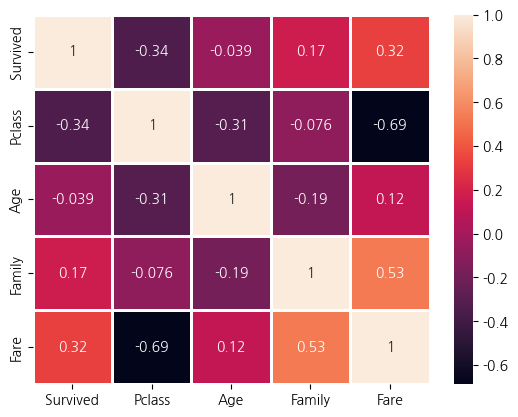

In [27]:
plt.figure()
sns.heatmap(corr_result, annot=True, linewidths=1)
plt.show()

Name, Ticket은 유일값이 너무 많아 의미 없음. passengerld 의미 없음, fare도 인원에 의해 좌우되고 pclass와 상관도가 높기 때문에=> 삭제

In [28]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family'],
      dtype='object')

In [29]:
data = data.drop(['Name', 'Ticket', 'PassengerId', 'Fare', 'SibSp','Parch'], axis=1)

In [30]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


Age 컬럼 구간화
* 0 < x <= 10
* 0 <= x < 10 == right = False

In [31]:
data['Age'] = pd.cut(data['Age'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89] ,labels=['under10', '10s', '20s', '30s', '40s','50s','60s','70s','80s'])

In [32]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,20s,S,1
1,1,1,female,30s,C,1
2,1,3,female,20s,S,0
3,1,1,female,30s,S,1
4,0,3,male,30s,S,0


종속변수와 독립변수들 간의 관계 파악 groupby

In [33]:
cols = data.columns
cols

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'Family'], dtype='object')

In [34]:
data[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [35]:
for col in cols[1:]:
    display(data[[col, 'Survived']].groupby(col).mean())
    print()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


,Survived
Sex,
female,0.742038
male,0.188908


C:\Users\Admin\AppData\Local\Temp\ipykernel_2748\148592757.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(data[[col, 'Survived']].groupby(col).mean())


,Survived
Age,
under10,0.612903
10s,0.401961
20s,0.350000
30s,0.363372
40s,0.382022
50s,0.416667
60s,0.315789
70s,0.000000
80s,1.000000


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


,Survived
Family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [36]:
data[['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

Pclass가 1등급이고 Sex가 female일 경우 생존율이 높다. Pclass와 Sex가 중요 변수다

In [37]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,20s,S,1
1,1,1,female,30s,C,1
2,1,3,female,20s,S,0
3,1,1,female,30s,S,1
4,0,3,male,30s,S,0


# 종속변수와 독립변수 분리

In [38]:
X = data.drop('Survived', axis=1)
Y = data['Survived']

In [39]:
X

,Pclass,Sex,Age,Embarked,Family
0,3,male,20s,S,1
1,1,female,30s,C,1
2,3,female,20s,S,0
3,1,female,30s,S,1
4,3,male,30s,S,0
...,...,...,...,...,...
886,2,male,20s,S,0
887,1,female,10s,S,0
888,3,female,30s,S,3
889,1,male,20s,C,0


In [40]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# 종속변수의 분포
* 0과 1의 개수가 일치하지 않음 
* 클래스 불균형
  * 학습시 학습량에 차이가 남
  * 사망자에 대한 학습은 549번 할 수 있지만 생존자에 대한 학습은 342번만 가능
* 클래스 불균형은 모델 성능에 영향을 끼칠 수 있고 편향의 문제를 유발
* 최대한 클래스 비율을 살려서 train/test를 분할
* 알고리즘에 클래스가 불균형하다는 것을 알려주는 옵션을 지정
* 데이터를 증폭/축소해서 균형을 맞춤

In [41]:
Y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# 데이터를 훈련 데이터와 테스트데이터로 분할
# 홀드아웃
* test_size: 전체 데이터 수에 따라서 8:2, 7:3, 6:4로 나눔
* random_state: 데이터를 섞는 코드, 랜덤스테이트에 따라 데이터 세트가 변경, 모델 성능에 영향을 줌
  * 똑같은 결과를 재현하기 위해서는 반드시 random_state를 맞춰주어야함
* stratify=y : y컬럼의 데이터 분포 비율을 똑같이 맞춰주는 역할

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [44]:
X_test

,Pclass,Sex,Age,Embarked,Family
862,1,female,40s,S,0
223,3,male,30s,S,0
84,2,female,10s,S,0
680,3,female,30s,Q,0
535,2,female,under10,S,2
...,...,...,...,...,...
247,2,female,20s,S,2
551,2,male,20s,S,0
239,2,male,30s,S,0
484,1,male,20s,C,1


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10, stratify=Y)
X_test

,Pclass,Sex,Age,Embarked,Family
703,3,male,20s,Q,0
329,1,female,10s,C,1
844,3,male,10s,S,0
681,1,male,20s,C,0
9,2,female,10s,C,1
...,...,...,...,...,...
412,1,female,30s,Q,1
846,3,male,30s,S,10
140,3,female,30s,C,2
667,3,male,30s,S,0


In [49]:
Y_train.value_counts(), Y_test.value_counts()

(Survived
 0    384
 1    239
 Name: count, dtype: int64,
 Survived
 0    165
 1    103
 Name: count, dtype: int64)

In [51]:
Y_train.value_counts(normalize=True), Y_test.value_counts(normalize=True)

(Survived
 0    0.616372
 1    0.383628
 Name: proportion, dtype: float64,
 Survived
 0    0.615672
 1    0.384328
 Name: proportion, dtype: float64)

# 문자로 된 데이터를 숫자로 변경 one-hot encoding
# 🟦 One-Hot Encoding 정리

## ✅ 1) 머신러닝 모델은 숫자만 입력받을 수 있다
범주형(카테고리) 변수는 문자 형태 그대로는 모델이 처리할 수 없다.

예시:
- `Sex = ["male", "female"]`
- `Embarked = ["C", "Q", "S"]`

문자 데이터는 **순서/거리 개념이 없기 때문에**  
머신러닝 모델에 입력하기 위해서는 반드시 **숫자로 변환**해야 한다.

---

## ✅ 2) LabelEncoder는 범주 간 “순서를 만들어 버리는 문제”가 있다
LabelEncoder는 각 범주를 숫자로 변환하되 **임의의 순서를 부여한다.**

| Category | Encoded |
|----------|---------|
| C        | 0       |
| Q        | 1       |
| S        | 2       |

그러나 실제로는:
- C < Q < S  
- 또는 Q > S 같은 **순서/크기 관계가 존재하지 않는다.**

이러한 잘못된 순서 정보는  
Logistic Regression, SVM, Linear Model 같은  
**거리 기반 모델에 심각한 오류(데이터 왜곡)**를 만든다.

---

## ✅ 3) OneHotEncoder는 “순서를 없애고” 모든 범주를 독립 컬럼으로 분리한다
One-Hot Encoding은 각 범주를 **독립된 컬럼**으로 만들고  
해당 범주일 때만 1, 아니면 0을 넣는 방식이다.

예: `Embarked = ["C", "Q", "S"]`

| Embarked_C | Embarked_Q | Embarked_S |
|------------|------------|------------|
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 0 | 0 | 1 |

✅ 범주 간 **순서·거리 개념이 제거됨**  
✅ 대부분의 모델에서 **성능 향상**  
✅ 데이터 해석이 더 직관적  
✅ train/test split 후에도 안정적으로 작동 (OneHotEncoder 사용 시)

In [52]:
pd.get_dummies(X_train)

,Pclass,Family,Sex_female,Sex_male,Age_under10,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,Embarked_C,Embarked_Q,Embarked_S
155,1,1,False,True,False,False,False,False,False,True,False,False,False,True,False,False
14,3,0,True,False,False,True,False,False,False,False,False,False,False,False,False,True
421,3,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False
432,2,1,True,False,False,False,False,False,True,False,False,False,False,False,False,True
484,1,1,False,True,False,False,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1,0,True,False,False,False,False,False,True,False,False,False,False,False,False,True
365,3,0,False,True,False,False,False,True,False,False,False,False,False,False,False,True
600,2,3,True,False,False,False,True,False,False,False,False,False,False,False,False,True
664,3,1,False,True,False,False,True,False,False,False,False,False,False,False,False,True


In [53]:
pd.get_dummies(X_test)

,Pclass,Family,Sex_female,Sex_male,Age_under10,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,Embarked_C,Embarked_Q,Embarked_S
703,3,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False
329,1,1,True,False,False,True,False,False,False,False,False,False,False,True,False,False
844,3,0,False,True,False,True,False,False,False,False,False,False,False,False,False,True
681,1,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False
9,2,1,True,False,False,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1,1,True,False,False,False,False,True,False,False,False,False,False,False,True,False
846,3,10,False,True,False,False,False,True,False,False,False,False,False,False,False,True
140,3,2,True,False,False,False,False,True,False,False,False,False,False,True,False,False
667,3,0,False,True,False,False,False,True,False,False,False,False,False,False,False,True


In [58]:
X_train

,Pclass,Sex,Age,Embarked,Family
155,1,male,50s,C,1
14,3,female,10s,S,0
421,3,male,20s,Q,0
432,2,female,40s,S,1
484,1,male,20s,C,1
...,...,...,...,...,...
796,1,female,40s,S,0
365,3,male,30s,S,0
600,2,female,20s,S,3
664,3,male,20s,S,1


In [54]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
cate_cols = ['Pclass', 'Sex', 'Age', 'Embarked', 'Family']
num_cols = ['Family']

In [65]:
ohe = OneHotEncoder(drop='first', handle_unknown="ignore", sparse_output=False)
# one-hot-encoding 훈련 - 카테고리 자료 전체를 조사해서 목록 만들기, 반드시 train 데이터만 fit을 시킴 !!!!!!
ohe.fit(X_train[cate_cols])
X_train_ohe = ohe.transform(X_train[cate_cols]) # fit에서 만든 목록에 숫자 붙여 내보내기 
X_test_ohe = ohe.transform(X_test[cate_cols])

In [66]:
ohe_cols = ohe.get_feature_names_out(cate_cols)
ohe_cols

array(['Pclass_2', 'Pclass_3', 'Sex_male', 'Age_20s', 'Age_30s',
       'Age_40s', 'Age_50s', 'Age_60s', 'Age_70s', 'Age_80s',
       'Age_under10', 'Embarked_Q', 'Embarked_S', 'Family_1', 'Family_2',
       'Family_3', 'Family_4', 'Family_5', 'Family_6', 'Family_7',
       'Family_10'], dtype=object)

In [68]:
#데이터프레임으로 변환
X_train_ohe_df = pd. DataFrame(X_train_ohe, columns=ohe_cols, index=X_train.index)
X_train_ohe_df

,Pclass_2,Pclass_3,Sex_male,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,...,Embarked_Q,Embarked_S,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10
155,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
432,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
600,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
664,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
X_test_ohe_df = pd. DataFrame(X_test_ohe, columns=ohe_cols, index=X_test.index)
X_test_ohe_df

,Pclass_2,Pclass_3,Sex_male,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,...,Embarked_Q,Embarked_S,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10
703,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
844,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
681,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
846,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
140,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 분석 모델 선택 및 분석 (의사결정나무)

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [79]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_ohe_df, Y_train)
pred = dtc.predict(X_test_ohe_df)
print(accuracy_score(Y_test, pred)) #실행하면 정확도가 나옴 0.817...
print(classification_report(Y_test, pred))

0.8059701492537313
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       165
           1       0.81      0.65      0.72       103

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



In [76]:
Y_test

703    0
329    1
844    0
681    1
9      1
      ..
412    1
846    0
140    0
667    0
205    0
Name: Survived, Length: 268, dtype: int64

# 의사결정나무 시각화 

In [80]:
from sklearn.tree import plot_tree

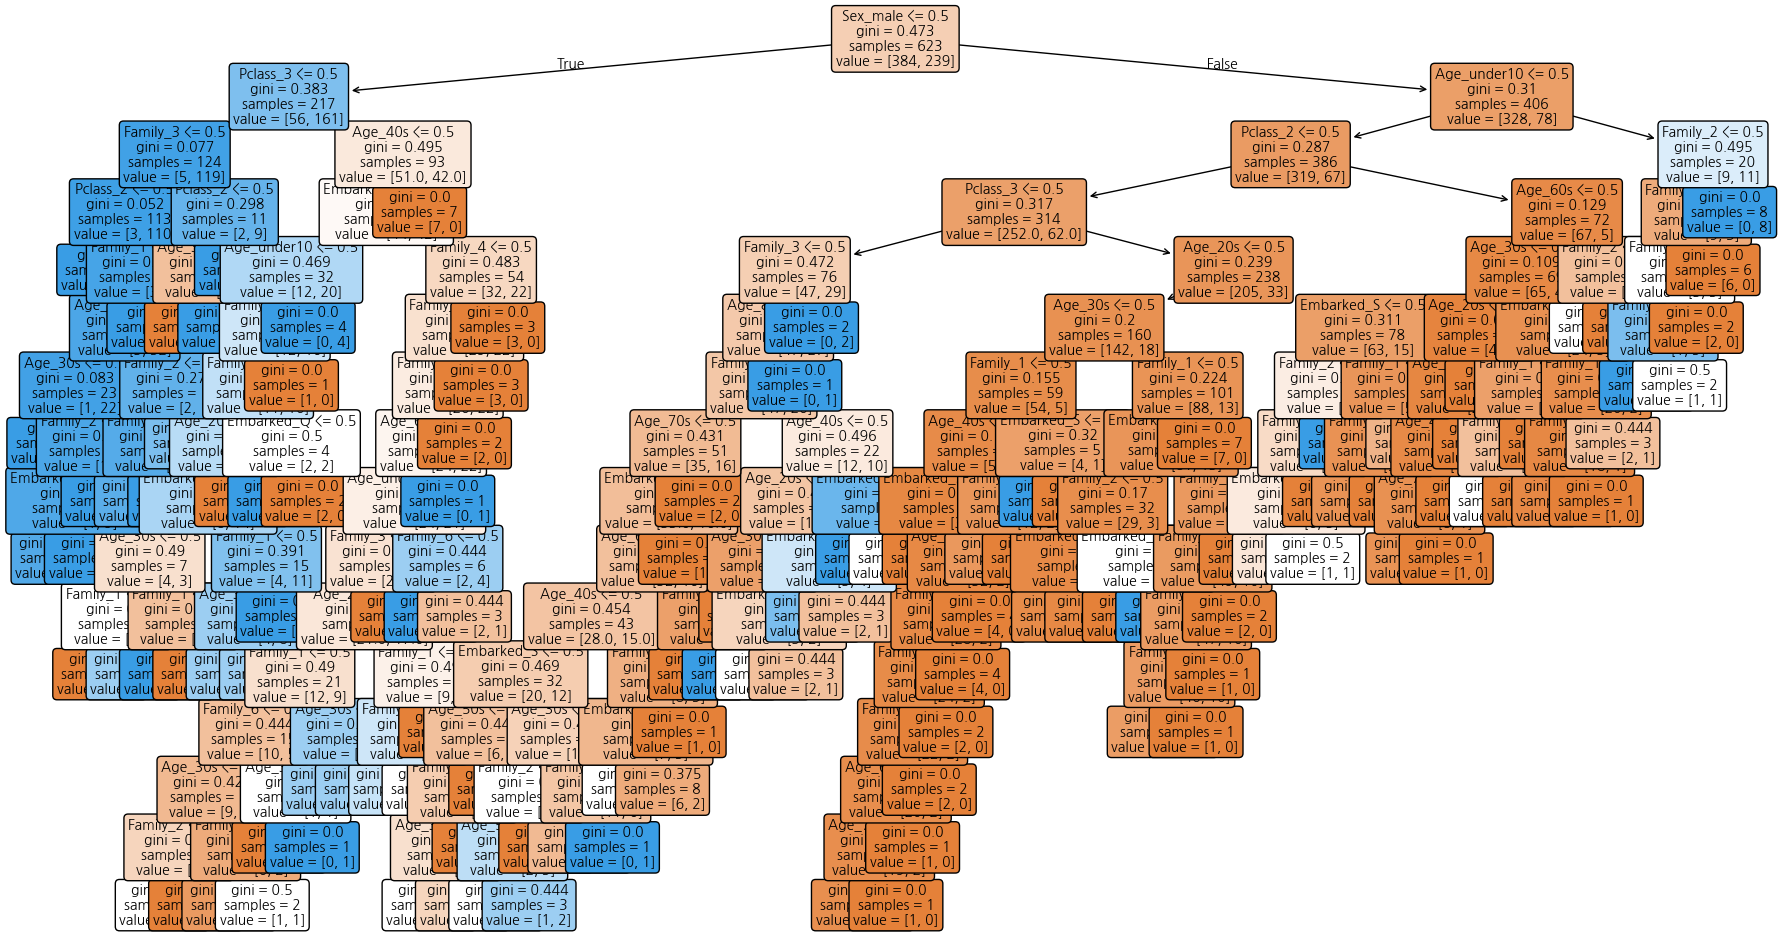

In [81]:
plt.figure(figsize=(22, 12))
plot_tree(dtc, filled=True, rounded=True, fontsize=10, feature_names=X_train_ohe_df.columns)
plt.show()

# 하이퍼파라미터 튜닝, 과적합 방지

In [88]:
dtc = DecisionTreeClassifier(max_depth=1, criterion='log_loss')
dtc.fit(X_train_ohe_df, Y_train)
pred2 = dtc.predict(X_test_ohe_df)
print(accuracy_score(Y_test, pred2))
print(classification_report(Y_test, pred2))

0.7910447761194029
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       165
           1       0.74      0.70      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



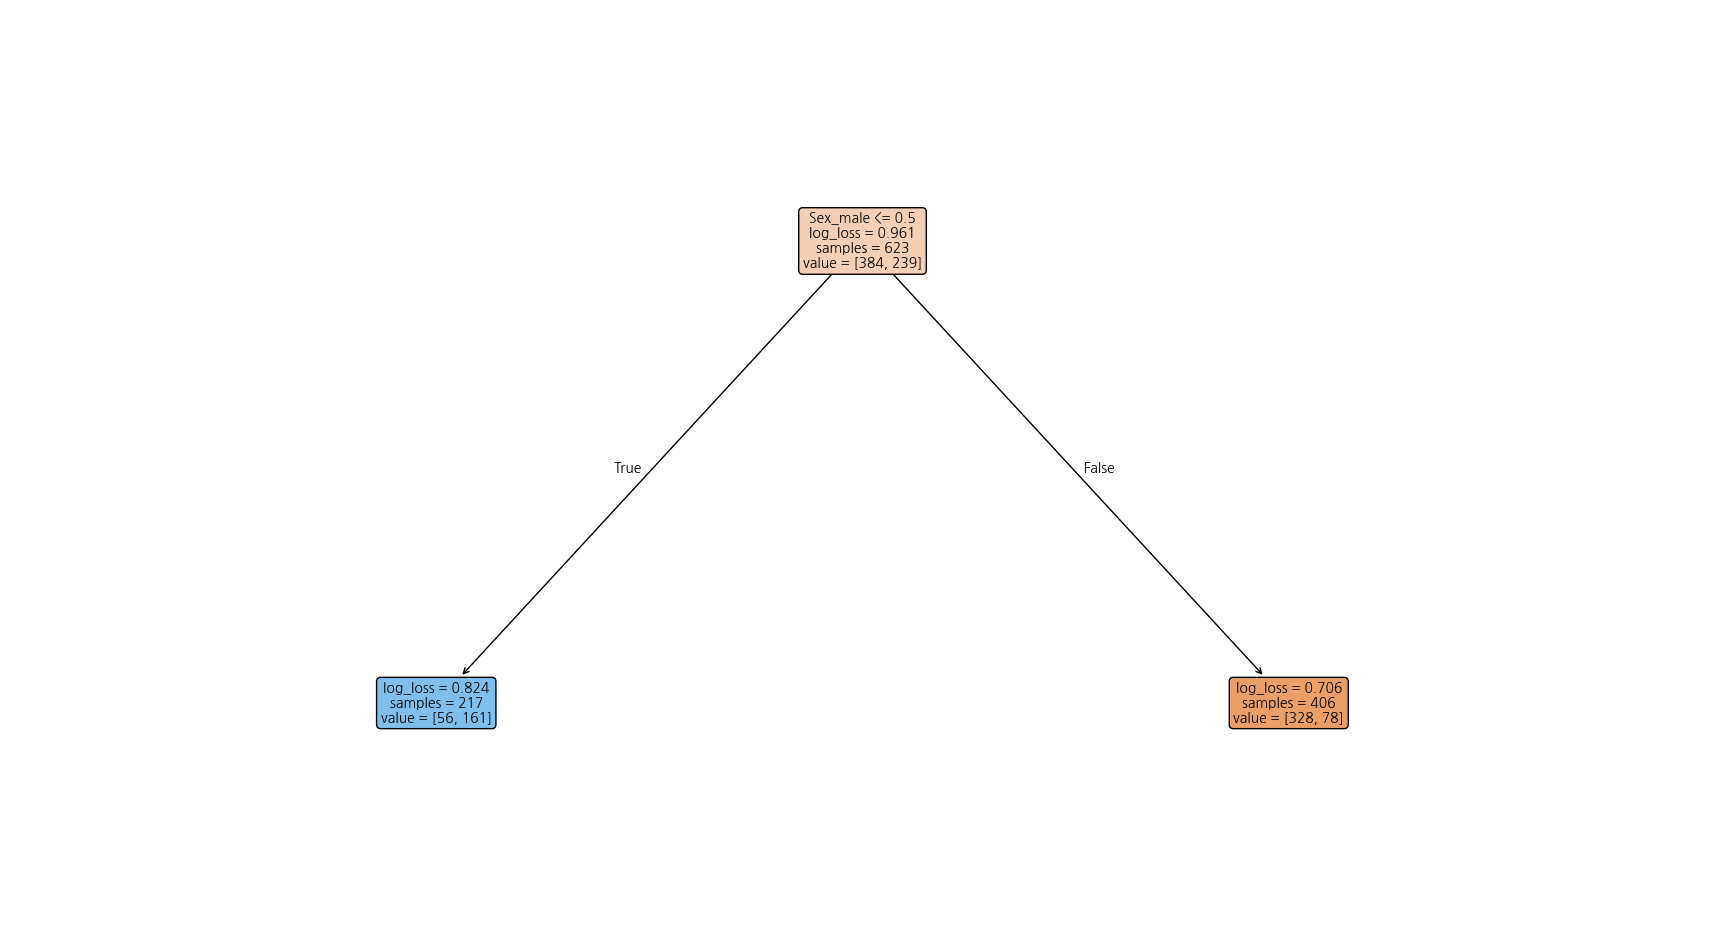

In [89]:
plt.figure(figsize=(22, 12))
plot_tree(dtc, filled=True, rounded=True, fontsize=10, feature_names=X_train_ohe_df.columns)
plt.show()

In [100]:
dtc2 = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42, class_weight='balanced')
dtc2.fit(X_train_ohe_df, Y_train)
pred2 = dtc2.predict(X_test_ohe_df)
print(f"max_depth={i}", accuracy_score(Y_test, pred2))
print(classification_report(Y_test, pred2))

max_depth=1 0.8171641791044776
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       165
           1       0.76      0.77      0.76       103

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [101]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_ohe_df, Y_train)
pred = dtc.predict(X_test_ohe_df)
print(accuracy_score(Y_test, pred))
print(classification_report(Y_test, pred))

0.8059701492537313
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       165
           1       0.81      0.65      0.72       103

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268

